## Домашнее задание 2: Нейросеть для распознавания изображений на датасете FashionMNIST

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import math

Загрузка обучающего и тестового Датасетов, создание DataLoader для каждого из них

In [2]:
Data_train = torchvision.datasets.FashionMNIST('.', download=True, train=True,  
                                        transform= torchvision.transforms.ToTensor())
Data_test = torchvision.datasets.FashionMNIST('.', download=True, train=False,  
                                        transform= torchvision.transforms.ToTensor())

train = torch.utils.data.DataLoader(Data_train, batch_size=200, shuffle=True)
test = torch.utils.data.DataLoader(Data_test, batch_size=200, shuffle=True)

Проверим размерности входных данных, а также покажем виды для классификации

In [3]:
Data_train[0][0].shape

torch.Size([1, 28, 28])

In [4]:
data_type = set()
for i in range(len(Data_train)):
    data_type.add(Data_train[i][1])
print('Виды одежды - ', data_type)
print('Количество видов одежы - ', len(data_type))

Виды одежды -  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Количество видов одежы -  10


Задаём архитектуру нейросети из 4 слоев с батч-нормализацией

In [5]:
model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Linear(784, 2000),
                            torch.nn.Tanh(), 
                            torch.nn.Dropout(0.4),
                            torch.nn.BatchNorm1d(2000),
                            torch.nn.Dropout(0.4),
                            torch.nn.Linear(2000, 1000),                            
                            torch.nn.ReLU(), 
                            torch.nn.BatchNorm1d(1000),
                            torch.nn.Dropout(0.4),
                            torch.nn.Linear(1000, 500),                            
                            torch.nn.ReLU(),
                            torch.nn.BatchNorm1d(500),
                            torch.nn.Dropout(0.4),
                            torch.nn.Linear(500, 200),                            
                            torch.nn.ReLU(),
                            torch.nn.BatchNorm1d(200),
                            torch.nn.Linear(200, 10),
                            )

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = torch.nn.CrossEntropyLoss()

In [6]:
epoch_num = 50
hist_train = np.array([])
hist_test = np.array([])
acc_train = np.array([])
acc_test = np.array([])

for epoch in range(1, epoch_num+1):
    
    ep_hist_train, ep_hist_test = 0, 0
    ep_acc_train, ep_acc_test = 0, 0
    
    model.train()
    for X, Y in train:
        optimizer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, Y)
        l.backward()
        optimizer.step()
        
        ep_hist_train += l.item()
        ep_acc_train += (y_pred.argmax(dim=1) == Y).sum().item()
    
    model.eval()
    for X, Y in test:        
        y_pred = model(X)
        l = loss(y_pred, Y)
        
        ep_hist_test += l.item()
        ep_acc_test += (y_pred.argmax(dim=1) == Y).sum().item()
    
    hist_train = np.append(hist_train, ep_hist_train/len(Data_train))
    hist_test = np.append(hist_test, ep_hist_test/len(Data_test))
    acc_train = np.append(acc_train, ep_acc_train/len(Data_train)*100)
    acc_test = np.append(acc_test, ep_acc_test/len(Data_test)*100)
    
    if (epoch % 2) == 0:
        print('Done ', epoch, ' of ', epoch_num, ' which is ', 
              math.ceil(epoch/epoch_num*100), '%')

print('Training Done')

Done  2  of  50  which is  4 %
Done  4  of  50  which is  8 %
Done  6  of  50  which is  12 %
Done  8  of  50  which is  16 %
Done  10  of  50  which is  20 %
Done  12  of  50  which is  24 %
Done  14  of  50  which is  29 %
Done  16  of  50  which is  32 %
Done  18  of  50  which is  36 %
Done  20  of  50  which is  40 %
Done  22  of  50  which is  44 %
Done  24  of  50  which is  48 %
Done  26  of  50  which is  52 %
Done  28  of  50  which is  57 %
Done  30  of  50  which is  60 %
Done  32  of  50  which is  64 %
Done  34  of  50  which is  68 %
Done  36  of  50  which is  72 %
Done  38  of  50  which is  76 %
Done  40  of  50  which is  80 %
Done  42  of  50  which is  84 %
Done  44  of  50  which is  88 %
Done  46  of  50  which is  92 %
Done  48  of  50  which is  96 %
Done  50  of  50  which is  100 %
Training Done


Построим графики Лосс-функции и точности на обучающей и тестовой выборках

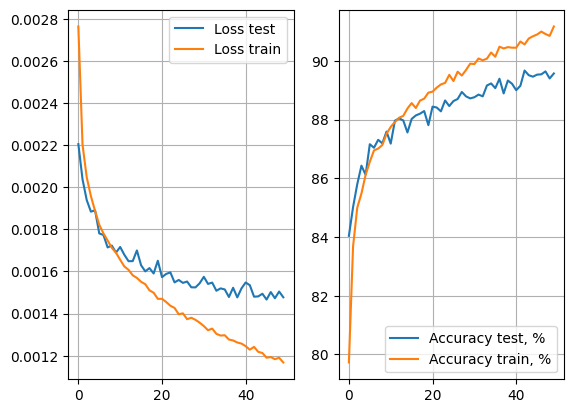

In [7]:
plt.subplot(1, 2, 1)
plt.plot(hist_test, label='Loss test')
plt.plot(hist_train, label='Loss train')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_test, label='Accuracy test, %')
plt.plot(acc_train, label='Accuracy train, %')
plt.grid()
plt.legend()